In [26]:
# 引入Python包，在jupyter notebook 运行后可以直接输出多个变量 注意大小写
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
from keras.datasets import reuters
(train_data, train_lables), (test_data, test_lables) = reuters.load_data(num_words=10000)

In [28]:
len(train_data)
len(test_data)
train_data.shape
test_data.shape

8982

2246

(8982,)

(2246,)

In [29]:
train_data[:1]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
      dtype=object)

In [30]:
word_index = reuters.get_word_index() 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])  
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in 
    train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [31]:
train_lables[1]

4

In [32]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.
    return result

In [33]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [34]:
# 直接是整数张量
y_train = np.asarray(train_lables).astype('int8')
y_test = np.asarray(test_lables).astype('int8')

In [35]:
# one_hot
def to_one_hot(labels, dimension=46):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1.
    return result

In [36]:
one_hot_train_labels = to_one_hot(train_lables)
one_hot_test_labels = to_one_hot(test_lables)

In [37]:
# keras 内置方法
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_lables)
one_hot_test_labels = to_categorical(test_lables)

In [51]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))

In [52]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [54]:
history = network.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 139us/step - loss: 2.6240 - accuracy: 0.5309 - val_loss: 1.7157 - val_accuracy: 0.6680
Epoch 2/9
7982/7982 [==============================] - 1s 124us/step - loss: 1.3941 - accuracy: 0.7150 - val_loss: 1.2999 - val_accuracy: 0.7280
Epoch 3/9
7982/7982 [==============================] - 1s 141us/step - loss: 1.0394 - accuracy: 0.7830 - val_loss: 1.1297 - val_accuracy: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 135us/step - loss: 0.8231 - accuracy: 0.8266 - val_loss: 1.0458 - val_accuracy: 0.7720
Epoch 5/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.6642 - accuracy: 0.8597 - val_loss: 0.9867 - val_accuracy: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.5353 - accuracy: 0.8877 - val_loss: 0.9493 - val_accuracy: 0.7980
Epoch 7/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.432

In [56]:
import matplotlib.pyplot as plt

In [55]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0.5, 1.0, 'Training and Validation loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

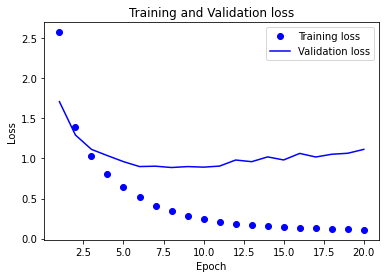

In [46]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'bo', label='Training loss')
plt.plot(epoch, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Text(0.5, 1.0, 'Training and Validation acc')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

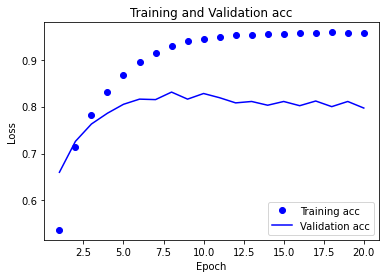

In [47]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epoch = range(1, len(loss_values) + 1)
plt.clf()
plt.plot(epoch, acc_values, 'bo', label='Training acc')
plt.plot(epoch, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Text(0.5, 1.0, 'Training and Validation loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

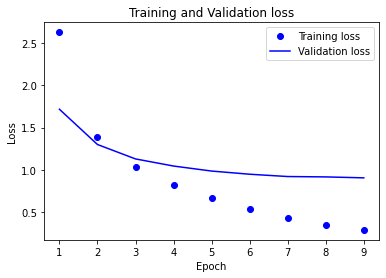

In [57]:
# epoch == 9
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'bo', label='Training loss')
plt.plot(epoch, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Text(0.5, 1.0, 'Training and Validation acc')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

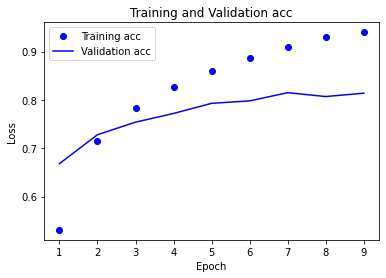

In [58]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epoch = range(1, len(loss_values) + 1)
plt.clf()
plt.plot(epoch, acc_values, 'bo', label='Training acc')
plt.plot(epoch, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [59]:
reuters = network.evaluate(x_test, one_hot_test_labels)
reuters

2246/2246 [==============================] - 0s 125us/step


[1.001613295725808, 0.7831701040267944]

In [60]:
# 完全随机分类
import copy
test_lables_copy = copy.copy(test_lables)
np.random.shuffle(test_lables_copy)
hits_array = np.array(test_lables) == np.array(test_lables_copy)
float(np.sum(hits_array)) / len(test_lables)

0.1918967052537845

In [61]:
predictions = network.predict(x_test)
predictions[0].shape

(46,)

In [62]:
np.sum(predictions[0])

1.0

In [63]:
np.argmax(predictions[0])

3